In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
from matplotlib import colormaps
from result import *
from adjustText import adjust_text

def load_pkl(path):
    with open(path, 'rb') as file:
        loaded_dict = pickle.load(file)
    return loaded_dict

FILTERING_S_ALG = ['SD_LONGEST', 'SD_EARLIEST', 'SD_RANDOM','SD_OUR']
FILTERING_C_ALG = ['C_EARLIEST', 'C_RANDOM', 'C_OUR']
FILTERING_UE_ALG = ['SS_LONGEST', 'SS_RANDOM','SS_OUR']
FILTERING_ACCESS_OPPORTUNITIES_ALG = ['2', 'x8', 'x12']
FILTER_MAX_AND_MIN = True
FILTER_PERCENT = 1


directory_path = './'
result = {}

def translate_label(source_alg, candidate_alg, ue_alg):
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_RANDOM':
        return 'A'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_EARLIEST':
        return 'B'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_LONGEST':
        return 'C'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_RANDOM':
        return 'D'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_EARLIEST':
        return 'E'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_LONGEST':
        return 'F'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_RANDOM':
        return 'G'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_EARLIEST':
        return 'H'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_LONGEST':
        return 'I'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_RANDOM':
        return 'J'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_EARLIEST':
        return 'K'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_LONGEST':
        return 'L'
    if ue_alg == 'SS_OUR' and candidate_alg == 'C_OUR' and source_alg == 'SD_OUR':
        return 'L\nC\nH'
    

# Loop through the files in the directory
for filename in os.listdir(directory_path):
    # Check if the file ends with .pkl
    if filename.endswith('.pkl'):
        print(filename)
        source_alg = filename[:-4].split('|')[0]
        candidate_alg = filename[:-4].split('|')[1]
        ue_alg = filename[:-4].split('|')[2]
        access_opportunities = filename[:-4].split('|')[3]
        if (source_alg in FILTERING_S_ALG
        and candidate_alg in FILTERING_C_ALG
        and ue_alg in FILTERING_UE_ALG
        and access_opportunities in FILTERING_ACCESS_OPPORTUNITIES_ALG):
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)] = load_pkl(filename)
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'] = np.array(result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'])
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['paper_label'] = translate_label(source_alg, candidate_alg, ue_alg)

result = prepare_result(result, FILTER_MAX_AND_MIN, FILTER_PERCENT)

SD_OUR|C_OUR|SS_OUR|22.pkl
SD_LONGEST|C_RANDOM|SS_RANDOM|2.pkl
SD_EARLIEST|C_EARLIEST|SS_LONGEST|2.pkl
SD_EARLIEST|C_RANDOM|SS_RANDOM|2.pkl
SD_LONGEST|C_EARLIEST|SS_LONGEST|2.pkl
SD_RANDOM|C_EARLIEST|SS_LONGEST|2.pkl
SD_LONGEST|C_RANDOM|SS_LONGEST|2.pkl
SD_EARLIEST|C_RANDOM|SS_LONGEST|2.pkl
SD_LONGEST|C_EARLIEST|SS_RANDOM|2.pkl
SD_OUR|C_OUR|SS_OUR|2.pkl
SD_RANDOM|C_EARLIEST|SS_RANDOM|2.pkl
SD_RANDOM|C_RANDOM|SS_LONGEST|2.pkl
SD_RANDOM|C_RANDOM|SS_RANDOM|2.pkl
SD_EARLIEST|C_EARLIEST|SS_RANDOM|2.pkl
C Maximum signalling value: 25 at index [(8, 7906), (9, 6573), (11, 8953)]
K Maximum signalling value: 24 at index [(8, 7905), (8, 7915), (13, 7989)]
B Maximum signalling value: 34 at index [(13, 7989)]
L Maximum signalling value: 55 at index [(11, 8945), (11, 8953)]
J Maximum signalling value: 24 at index [(8, 7905), (8, 7915), (13, 7989)]
I Maximum signalling value: 49 at index [(11, 8953)]
H Maximum signalling value: 24 at index [(11, 8951)]
F Maximum signalling value: 22 at index [(2, 458

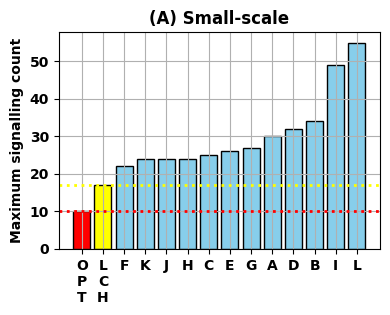

In [2]:
draw_prepared_result(result)

In [ ]:
# # The figure describes the maximum signalling of each satellite
# draw_max_signalling(result)
# draw_cumulative_load_each_time(result)
# draw_total_load_each_satellite(result)
# draw_busy_hour_distribution(result)
# draw_max_reservation(result)
# draw_heatmap(result, 100)

In [6]:
result[('SD_OUR',
  'C_OUR',
  'SS_OUR',
  '2')]['ue_delay_history']

[[1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1],
 [1, 1, 2],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1],
 [1, 1, 1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [2, 1],
 [1, 1],
 [1, 1, 1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1, 2],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1, 1, 1],
 [1, 1, 1],
 [1, 2],
 [1, 1, 1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 2],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 2],
 [1, 1, 1],
 [2, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 2, 2, 2],
 [1, 1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [2, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1]